In [ ]:
# preliminary-analysis-2024-comb-building.ipynb
#
# Bryan Daniels
# 2024/3/29
#
# Continuing analysis started in 2021, looking for predictors of comb-building
# and thinking about ways the dynamics of the total amount of comb-building 
# could be modeled
#

In [1]:
import pandas as pd
import numpy as np
import pickle, gzip
import matplotlib.pyplot as plt
%matplotlib inline
from toolbox import defaultFigure
defaultFigure.setDefaultParams()
from toolbox import gifsicle
from tqdm import tqdm
from importlib import reload  

In [2]:
# import stuff from jacob davidson's github repository: https://github.com/jacobdavidson/bees_drones_2019data
from bees_drones_2019data import displayfunctions as bp  # 'bee plots'
from bees_drones_2019data import datafunctions as dfunc
from bees_drones_2019data import definitions_2019 as bd
dfunc.init(bd) 
bp.init(bd)
bd.year

2019

# Load data

The days with festoons are roughly (1) between day 4 and 20 and (2) between day 46 and 65

In [3]:
days_to_load = np.arange(4,5)

## Load 5-minute behavioral data

(Note that these data are in a different format than what was loaded in `preliminary-analysis-2021-comb-building.ipynb`)

In [4]:
# data from 2019: https://zenodo.org/records/7298798
behavioral_data_dir = '../Data/240329/df_day5min/'

In [5]:
dfList = [ pd.read_hdf('{}df_day5min_{:03d}.hdf'.format(behavioral_data_dir,daynum)) for daynum in days_to_load ]
dfFiveMinute = pd.concat(dfList)

In [132]:
# time conversion
minutes_per_division = 5
divisions_per_day = int(24*60/minutes_per_division)
dfFiveMinute['Time (days)'] = dfFiveMinute['Day number'] + dfFiveMinute['timedivision']/divisions_per_day

## Load trajectory data

In [7]:
# data from 2019: https://zenodo.org/records/7298798
trajectory_data_dir = '../Data/231018/trajectories_000-019/'

In [8]:
#dfTrajList = [ pd.read_hdf('{}beetrajectories_{:03d}.hdf'.format(trajectory_data_dir,daynum)) for daynum in days_to_load ]
#dfTraj = pd.concat(dfTrajList) # avoid explicitly creating list to save memory
filenames = [ '{}beetrajectories_{:03d}.hdf'.format(trajectory_data_dir,daynum) for daynum in days_to_load ]
dfTraj = pd.concat(map(pd.read_hdf,filenames))

In [9]:
# time conversion
frames_per_second = 3
frames_per_day = 24*60*60*frames_per_second
dfTraj['Time (days)'] = dfTraj['daynum'] + dfTraj['framenum']/frames_per_day

In [10]:
dfTraj.head()

,daynum,framenum,uid,x,y,camera,theta,Time (days)
0,4,0,4,576,4770,0,2.84584,4.000000
1,4,6,4,563,4762,0,-3.06435,4.000023
2,4,7,4,563,4762,0,-3.11650,4.000027
3,4,8,4,557,4762,0,-2.96840,4.000031
4,4,9,4,557,4757,0,-2.99306,4.000035


In [11]:
print("Trajectories use {:.1f} GB of memory.".format(dfTraj.memory_usage().sum()/1e9))

Trajectories use 8.2 GB of memory.


## Load comb contents data

In [12]:
# data from 2019: https://zenodo.org/records/7298798
comb_contents_dir = '../Data/240329/comb-contents-images2019/'

In [13]:
# load the comb structure
combDict = dict([ (daynum, pickle.load(gzip.open(comb_contents_dir+'comb_{:03d}.pklz'.format(daynum),'rb'))) for daynum in days_to_load ])

In [14]:
combDict[4]

# Find bees that are festooning a lot or a little, and compare their trajectories

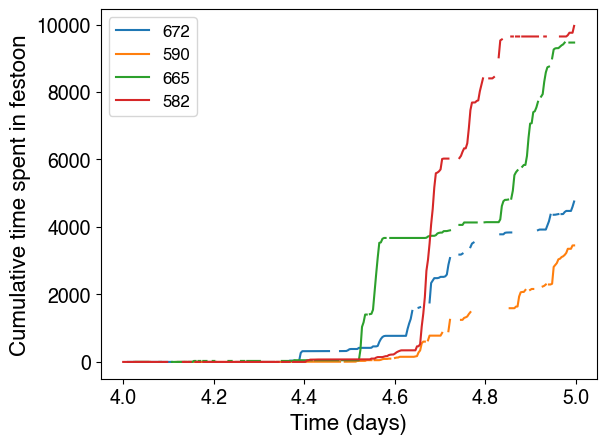

In [15]:
# sanity check: recreating a plot from preliminary-analysis-2021-comb-building.ipynb
# (largest festooners)
for beeID in [672,590,665,582]:
    dfFiveMinuteBee = dfFiveMinute[dfFiveMinute['Bee unique ID']==beeID]
    times = dfFiveMinuteBee['Time (days)']
    cumulativeFestoon = np.cumsum(dfFiveMinuteBee['Festoon'])
    plt.plot(times,cumulativeFestoon,label=beeID)
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Cumulative time spent in festoon');

In [18]:
dfFiveMinute.columns

Index(['Age', 'Num. observations', 'Honey', 'Brood care', 'Pollen',
       'Dance floor', 'Other', 'Frame 0', 'Frame 1', 'Frame 2', 'Frame 3',
       'Frame 4', 'Frame 5', 'Median speed', 'Speed IQR',
       'Speed 90th quantile', 'Dispersion (avg)', 'Exit distance (median)',
       'Fraction squares visited', 'Day number', 'Festoon', 'Empty comb',
       'Mean x-shifted', 'Mean y', 'Bee unique ID', 'Cohort ID',
       'Num. outside trips', 'Num. dance floor visits',
       'Dispersion-minute avg.', 'Frame 0 - Num. crossings',
       'Frame 1 - Num. crossings', 'Frame 2 - Num. crossings',
       'Frame 3 - Num. crossings', 'Frame 4 - Num. crossings',
       'Frame 5 - Num. crossings', 'timedivision', 'Time (days)'],
      dtype='object')

In [16]:
def plot_bees_at_time(dfTraj,daynum,framenum,ax=[]):
    
    ax = bp.showcomb(combDict[daynum],ax=ax)
    #plt.figure()
    #ax = plt.gca()
    dfTraj_one_frame = dfTraj[(dfTraj['daynum']==daynum) & (dfTraj['framenum']==framenum)]
    #print(dfTraj_one_frame)
    # for beeid in dfTraj_one_frame['uid'].unique():
    #     dfTraj_one_frame_one_bee = dfTraj_one_frame[dfTraj_one_frame['uid']==beeid]
    #     bp.plotbee_xy(dfTraj_one_frame_one_bee['x'],dfTraj_one_frame_one_bee['y'],dfTraj_one_frame_one_bee['camera'],
    #                   ax=ax,color='white',s=100,joined=False)
    return bp.plotbee_xy(dfTraj_one_frame['x'],dfTraj_one_frame['y'],dfTraj_one_frame['camera'],
                      ax=ax,color='white',s=100,joined=False)

In [17]:
plot_bees_at_time(dfTraj_cut,4,77761)

NameError: name 'dfTraj_cut' is not defined

In [25]:
reload(gifsicle)

<module 'toolbox.gifsicle' from '/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/toolbox/gifsicle.py'>

In [26]:
# make animated gif of bee motion
daynum = 4
bee_subset = [665] #[582]
min_day_frac,max_day_frac = 0.8,0.95
min_framenum,max_framenum = int(min_day_frac*frames_per_day),int(max_day_frac*frames_per_day)
frame_step = 500 # number of frames to skip between renderings
framenums = range(min_framenum,max_framenum,frame_step)
print("Plotting day {}, frames {} (hour {}) to {} (hour {}) ({} frames)...".format(
    daynum,min_framenum,min_framenum/frames_per_day*24,max_framenum,max_framenum/frames_per_day*24,len(framenums)))
dfTraj_cut = dfTraj[(dfTraj['daynum']==daynum) & (min_framenum < dfTraj['framenum']) & (dfTraj['framenum'] < max_framenum)]
if bee_subset:
    dfTraj_cut = dfTraj_cut[dfTraj_cut['uid'].isin(bee_subset)]
plot_func = lambda framenum: plot_bees_at_time(dfTraj_cut,daynum,framenum)
gifsicle.gifsiclePlot(plot_func,
                      framenums,
                      '240401_bee_trajectories_day_{}_frame_{}_to_{}.gif'.format(daynum,min_framenum,max_framenum),
                      delay=1,
                      annotateList=['day {}, hour {:.3f}'.format(daynum,frame/frames_per_day*24) for frame in framenums])
plt.close('all')

Plotting day 4, frames 207360 (hour 19.200000000000003) to 246240 (hour 22.799999999999997) (78 frames)...


100%|███████████████████████████████████████████| 78/78 [00:57<00:00,  1.35it/s]


gifsicleAnnotate: GIF animation written to 240401_bee_trajectories_day_4_frame_207360_to_246240.gif


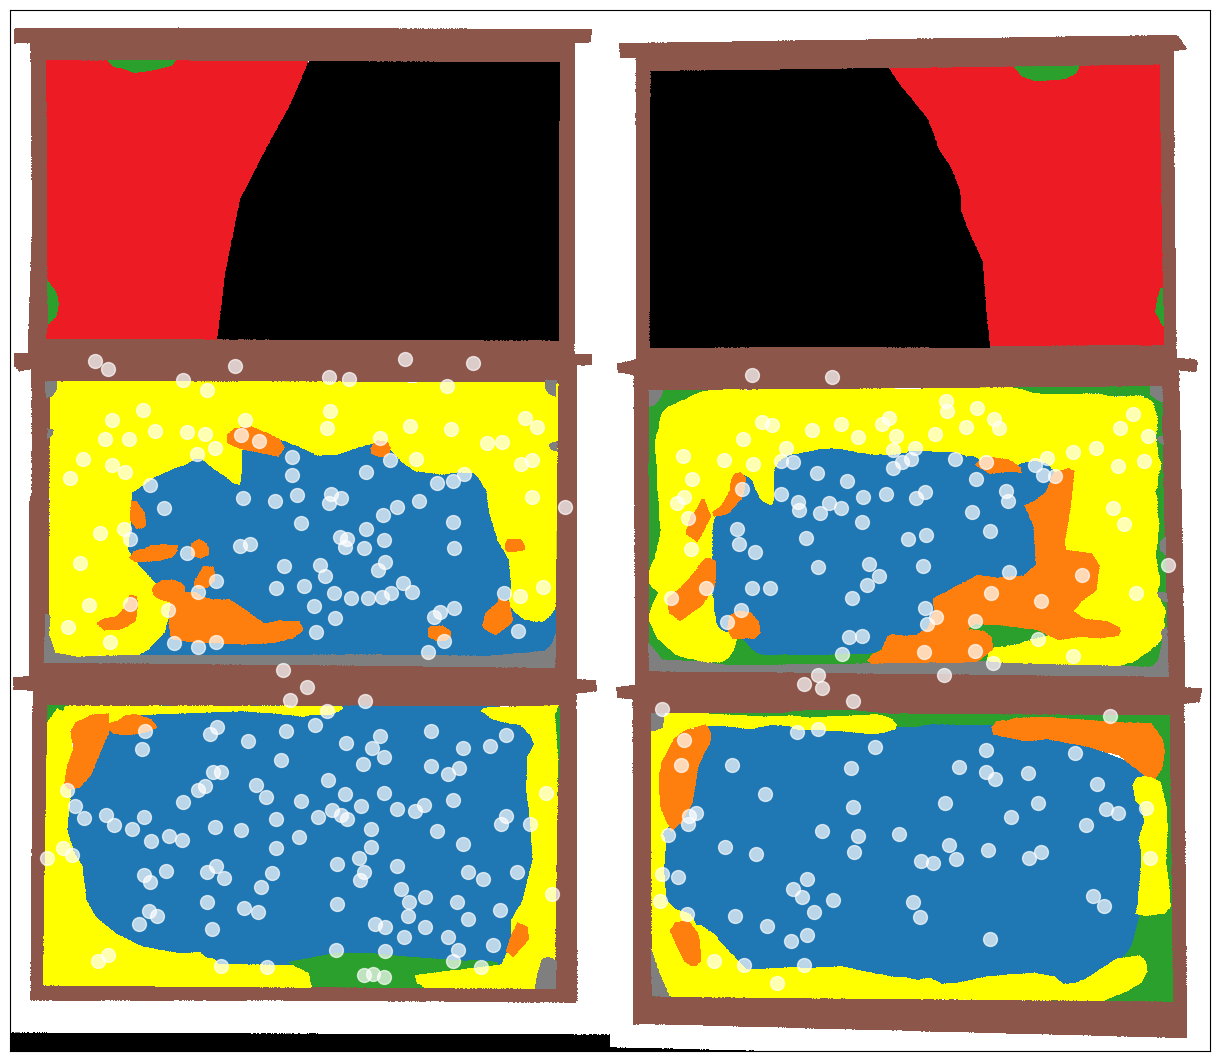

In [35]:
plot_bees_at_time(dfTraj,4,10)

<Axes: >

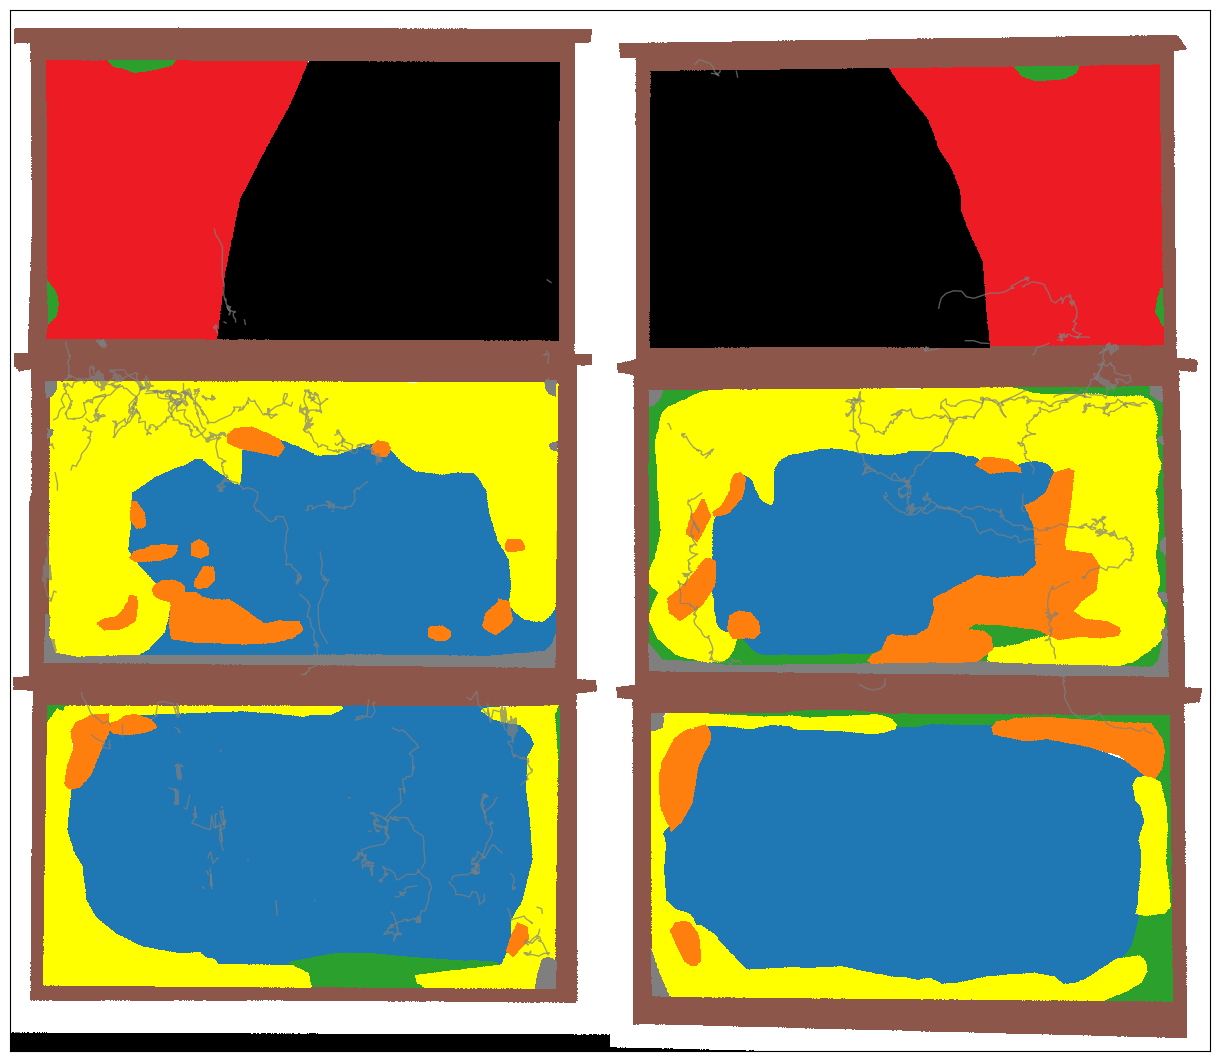

In [27]:
# plot trajectory of a single bee
beeID = 672 #582
minTime,maxTime = 4.3,4.4 # days
dfTraj_selected = dfTraj[(dfTraj['uid']==beeID) & (minTime < dfTraj['Time (days)']) & (dfTraj['Time (days)'] < maxTime)]

daynum = int(np.floor(minTime))
ax = bp.showcomb(combDict[daynum])
bp.plotbee_xy(dfTraj_selected['x'],dfTraj_selected['y'],dfTraj_selected['camera'],ax=ax,color='gray')
#bp.showframe(ax)

# what are statistics of in-festoon/out-of-festoon dynamics for individual bees?

In [ ]:
# odd: on day 4, one bee (bee 1522) shows up in the data often but with all NaNs

In [88]:
def bouts_from_time_series(series):
    """
    Takes pandas series indexed by time and returns dataframe with information about consecutive bouts
    over which behavior was constant.
    """
    # each element of bouts_list is a chunk of the original series over which behavior is constant
    bouts_list = np.split(series,np.where(np.diff(series)!=0)[0]+1)

    bouts_data = []
    for bout in bouts_list:
        bouts_data.append([bout.iloc[0],len(bout),bout.index[0],bout.index[-1]])

    return pd.DataFrame(bouts_data,columns=['Bout state','Bout length in time divisions','Bout start','Bout end'])

In [139]:
# (Note: get_onsubstrate seems to be currently limited to one day at a time)

# get_onsubstrate appears to be the equivalent of get_inout_estimates but for a particular substrate
# (the default substrate is "Festoon", which is what we want here)
# day_uids = list of bee ids (len # bees)
# day_ages = list of bee ages (len # bees)
# all_ontop = array of inferred binary status of bees vs. time: on the substrate or not (shape #bees x #times)
# bee_obs = number of observations of each bee in each time window (shape #bees x #times)
# bee_data = all relevant data in a 3D array (?) (shape #bees x #times x #statistics)
day_uids, day_ages, all_ontop, bee_obs, bee_data = dfunc.get_onsubstrate(dfFiveMinute)

# construct binary dataframe for "in festoon" versus time for each bee
df_festoon = pd.DataFrame(all_ontop,
                          columns=[ "Minute {}".format(timediv*minutes_per_division) for timediv in range(int(divisions_per_day))],
                          index=[ "Bee {}".format(uid) for uid in day_uids ])

# construct dataframe of festoon/non-festoon bouts for an individual bee 
bee_bouts_list = []
for beeid in df_festoon.index:
    bee_bouts = bouts_from_time_series(df_festoon.loc[beeid])
    bee_bouts['Bee id'] = int(beeid.removeprefix('Bee '))
    bee_bouts_list.append(bee_bouts)
df_festoon_bouts = pd.concat(bee_bouts_list).set_index('Bee id').dropna()

# include time conversion
df_festoon_bouts['Bout length in minutes'] = df_festoon_bouts['Bout length in time divisions']*minutes_per_division

/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/bdaniel6/opt/

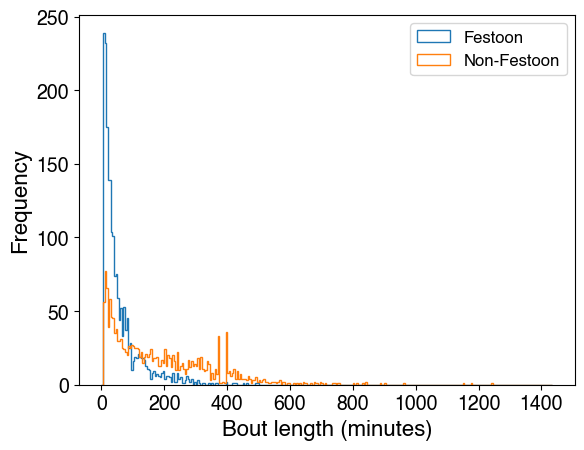

In [160]:
# exclude the bouts that start at minute 0
df_non_start_bouts = df_festoon_bouts[df_festoon_bouts['Bout start']!='Minute 0']

# plot histograms of lengths of festoon and non-festoon bouts
bins = minutes_per_division*np.arange(divisions_per_day)
df_non_start_bouts[df_non_start_bouts['Bout state']==1]['Bout length in minutes'].plot.hist(bins=bins,
                                                                                               label='Festoon',
                                                                                               histtype='step')
df_non_start_bouts[df_non_start_bouts['Bout state']==0]['Bout length in minutes'].plot.hist(bins=bins,
                                                                                               label='Non-Festoon',
                                                                                               histtype='step')
plt.xlabel('Bout length (minutes)')
plt.legend()

In [147]:
df_non_start_bouts[(df_non_start_bouts['Bout state']==1) & (df_non_start_bouts['Bout length in minutes']>400)]

,Bout state,Bout length in time divisions,Bout start,Bout end,Bout length in minutes
Bee id,,,,,
584,1.0,83,Minute 1025,Minute 1435,415
756,1.0,85,Minute 940,Minute 1360,425
1072,1.0,99,Minute 945,Minute 1435,495
1246,1.0,84,Minute 1020,Minute 1435,420
1331,1.0,92,Minute 980,Minute 1435,460
1497,1.0,98,Minute 950,Minute 1435,490
2070,1.0,90,Minute 975,Minute 1420,450


<Axes: >

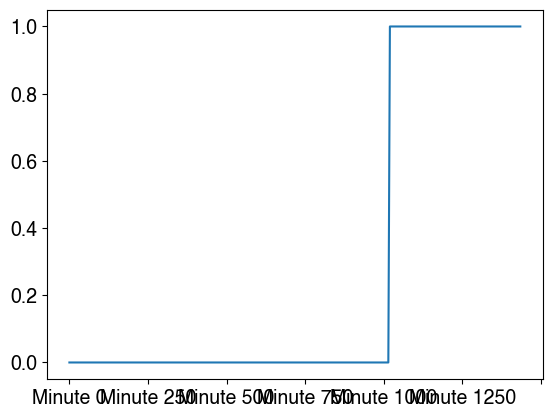

In [159]:
df_festoon.loc['Bee 1246'].plot()

In [154]:
df_festoon_bouts.loc[2070]

,Bout state,Bout length in time divisions,Bout start,Bout end,Bout length in minutes
Bee id,,,,,
2070,0.0,195,Minute 0,Minute 970,975
2070,1.0,90,Minute 975,Minute 1420,450
2070,0.0,3,Minute 1425,Minute 1435,15


In [116]:
min(df_festoon_bouts['Bout length in time divisions'])

1